## Dự đoán giá bán kim cương
---
Đọc dữ liệu 273 viên kim cương trong file Data/Data_Diamond.xlsx. Mỗi viên kim cương bao gồm 7 thuộc tính:

1. carat: Trọng lượng của viên kim cương, được đo bằng carat. Đây là một yếu tố quan trọng ảnh hưởng đến giá trị của viên kim cương.

2. cut: Chất lượng cắt của viên kim cương. Các mức chất lượng cắt phổ biến bao gồm:

    * Fair: Cắt ở mức thấp nhất, ít phản chiếu ánh sáng.
    * Good: Cắt khá tốt nhưng chưa tối ưu hóa độ lấp lánh.
    * Very Good: Phản chiếu ánh sáng rất tốt.
    * Ideal: Cắt hoàn hảo, tối ưu hóa ánh sáng và lấp lánh.
    * Premium: Cắt xuất sắc, đạt chất lượng cao nhất.

3. color: Màu sắc của viên kim cương, được đánh giá theo thang từ D (không màu) đến Z (màu vàng nhạt hoặc nâu). Trong bảng này, các màu như E, I, J, và H xuất hiện, thể hiện sự khác biệt về mức độ không màu.

4. clarity: Độ trong suốt của viên kim cương, phản ánh sự hiện diện của tạp chất hoặc khuyết điểm bên trong (inclusions) hoặc bên ngoài (blemishes). Các mức phổ biến bao gồm:

    * IF: Không có tạp chất.
    * VVS1 và VVS2: Tạp chất rất rất nhỏ.
    * VS1 và VS2: Tạp chất rất nhỏ.
    * SI1 và SI2: Tạp chất nhỏ, có thể nhìn thấy bằng mắt thường.
    * I1, I2, I3: Tạp chất dễ nhận thấy.
    
5. depth: Độ sâu của viên kim cương, được tính bằng tỷ lệ phần trăm giữa chiều cao viên kim cương so với đường kính trung bình của viên đá. Độ sâu ảnh hưởng đến cách ánh sáng phản chiếu trong viên kim cương.

6. table: Kích thước của mặt trên cùng (bàn) của viên kim cương, cũng được đo bằng tỷ lệ phần trăm so với đường kính của viên đá. Giá trị này ảnh hưởng đến cách ánh sáng lấp lánh.

7.price: Giá của viên kim cương, được tính bằng đơn vị tiền tệ (có thể là USD hoặc đơn vị khác).



In [156]:
#Gọi thư viện sử dụng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#----------------------------
import warnings
warnings.filterwarnings("ignore")

## Đọc và quan sát dữ liệu

In [157]:
#Đọc dữ liệu
data_diamond = pd.read_excel('Data/Data_Diamonds.xlsx')
data_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    273 non-null    float64
 1   cut      273 non-null    object 
 2   color    273 non-null    object 
 3   clarity  273 non-null    object 
 4   depth    273 non-null    float64
 5   table    273 non-null    float64
 6   price    273 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 15.1+ KB


In [158]:
#Hiển thị 5 bản ghi ngẫu nhiên
data_diamond.sample(5)

,carat,cut,color,clarity,depth,table,price
180,2.11,Fair,F,I1,67.6,57.0,7019
82,1.03,Good,J,SI1,63.6,57.0,2855
41,0.90,Premium,I,VS2,63.0,58.0,2761
229,2.40,Ideal,I,SI2,62.8,57.0,11988
223,2.26,Premium,H,SI2,61.9,58.0,11226


In [159]:
#Kiểm tra dữ liệu missing
data_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [160]:
#Kiểm tra dữ liệu trùng lặp
data_diamond.duplicated().sum()

0

In [161]:
#Thống kê các đặc trưng của dữ liệu số
data_diamond.describe()

,carat,depth,table,price
count,273.000000,273.000000,273.000000,273.000000
mean,1.608791,62.549451,57.874725,6308.117216
std,0.894875,2.618095,2.575746,4760.255092
min,0.200000,55.100000,52.000000,326.000000
25%,0.880000,61.100000,56.000000,2781.000000
50%,1.560000,62.100000,58.000000,5157.000000
75%,2.240000,63.800000,59.000000,9068.000000
max,5.010000,70.500000,69.000000,18701.000000


**NHẬN XÉT**
- Trọng lượng của viên kim cương (carat) từ 0.2 carat đến 5.01 carat, trung bình khoảng 1.6 carat
- Độ sâu của viên kim cương(depth) có tỷ lệ phần trăm thấp nhất là 55.1% và lớn nhất là 70.5%, trung bình là 62.5%
- Kích thước của mặt trên cùng(table) có tỷ lệ phần trăm thấp nhất là 52% và lớn nhất là 69%, trung bình khoảng 58%
- Giá của viên kim cương từ 326(có thể là USD hoặc đơn vị khác) đến 18701(có thể là USD hoặc đơn vị khác), với trung bình là 6308

In [162]:
#Thống kê các đặc trưng của dữ liệu Object
data_diamond.describe(include='O')

,cut,color,clarity
count,273,273,273
unique,5,7,8
top,Premium,H,SI2
freq,79,62,105


In [163]:
#Thống kê số lượng của chất lượng cắt của viên kim cương
data_diamond['cut'].value_counts()

cut
Premium      79
Fair         64
Ideal        60
Very Good    45
Good         25
Name: count, dtype: int64

In [164]:
#Thống kê số lượng của màu sắc của viên kim cương
data_diamond['color'].value_counts()

color
H    62
J    56
I    49
G    37
E    31
F    28
D    10
Name: count, dtype: int64

In [165]:
#Thống kê số lượng của chất lượng cắt của viên kim cương
data_diamond['clarity'].value_counts()

clarity
SI2     105
I1      101
SI1      25
VS2      15
VVS2     13
VVS1      6
VS1       5
IF        3
Name: count, dtype: int64

**NHẬN XÉT**
- Lát cắt thuộc loại xuất sắc(Premium) có số lượng nhiều nhất trong tập dữ liệu chiếm 79/273 mẫu tiếp đến là Fair với 64 mẫu, Ideal - 60 mẫu, Very Good - 45, Good - 25, không có viên kim cương nào có lát cắt ở mức thấp (Fair)
- Màu sắc thuộc lớp H chiếm nhiều nhất với 62/273 mẫu, lớp J có 56 mẫu, lớp I có 49 mẫu, các lớp G, E, F, D lần lượt có số mẫu là 37, 31, 28, 10
- Độ trong suốt của viên kim cương tập trung chủ yếu ở SI2 và I1 với số mẫu lần lượt là 105, 101

## Chuẩn hoá dữ liệu

In [166]:
#Tạo bản sao dữ liệu
data_diamond_ml = data_diamond.copy()
#Biến đổi dữ liệu Object về dạng số
#Biến đổi thuộc tính cut
data_diamond_ml['cut'] = data_diamond_ml['cut'].replace({'Fair':1,
                                                        'Good':2,
                                                        'Very Good':3,
                                                        'Ideal':4,
                                                        'Premium':5}).astype(int)
#Biến đổi thuộc tính color
data_diamond_ml['color'] = data_diamond_ml['color'].replace({'D':1,
                                                            'E':2,
                                                            'F':3,
                                                            'G':4,
                                                            'H':5,
                                                            'I':6,
                                                            'J':7}).astype(int)
#Biến đổi thuộc tính clarity
data_diamond_ml['clarity'] = data_diamond_ml['clarity'].replace({'IF':1,
                                                                 'VVS1':2,
                                                                 'VVS2':3,
                                                                 'VS1':4,
                                                                 'VS2':5,
                                                                 'SI1':6,
                                                                 'SI2':7,
                                                                 'I1':8}).astype(int)
#Dữ liệu mới sau khi chuyển đổi
data_diamond_ml

,carat,cut,color,clarity,depth,table,price
0,0.21,5,2,6,59.8,61.0,326
1,0.23,4,2,7,61.5,55.0,326
2,0.29,5,6,5,62.4,58.0,334
3,0.31,2,7,7,63.3,58.0,335
4,0.24,3,7,3,62.8,57.0,336
...,...,...,...,...,...,...,...
268,2.64,4,5,7,62.3,55.0,17407
269,5.01,1,7,8,65.5,59.0,18018
270,4.50,1,7,8,65.8,58.0,18531
271,2.67,2,3,7,63.8,58.0,18686


In [167]:
#Lưu dữ liệu đã xử lý ra file:
data_diamond_ml.to_csv('Data/Data_Diamonds_OK.csv',index=None)  

## Xây dựng mô hình hồi quy tuyến tính

### Xác định mức độ ảnh hưởng của các thuộc tính tới giá bán một viên kim cương:

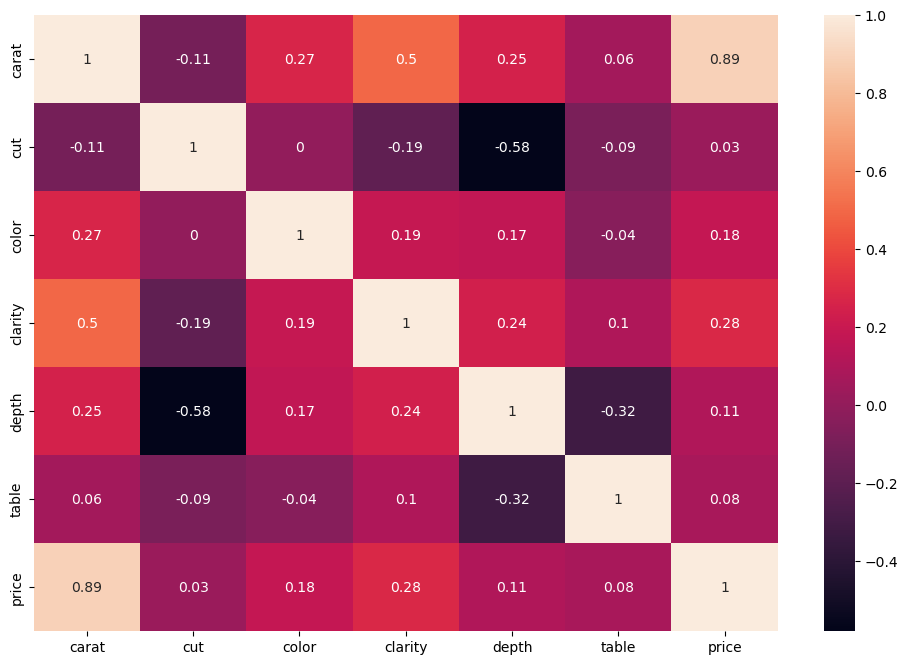

In [188]:
#Xác định hệ số tương quan trong tập dữ liệu
import seaborn as sns
correlation_matrix = data_diamond_ml.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Mức độ ảnh hưởng của các thuộc tính tới giá bán viên kim cương là khác nhau:**
1. Trọng lượng viên kim cương (carat) có mối tương quan thuận với giá bán(0.89) 
2. Chất lượng cắt viên kim cương(cut) có mối tương quan thuận với giá bán (0.03)
3. Màu sắc viên kim cương(color) có mối tương quan thuận với giá bán (0.18)
4. Độ trong suốt viên kim cương(clarity) có mối tương quan thuận với giá bán (0.28)
5. Độ sâu của viên kim cương(depth) có mối tương quan thuận với giá bán (0.11)
6. Kích thước của mặt trên cùng viên kim cương(table) có mối tương quan thuận với giá bán (0.08)


### Phân tách biến độc lập và biến phụ thuộc

In [189]:
#Tách biến độc lập
X_carat_db = data_diamond_ml[['carat', 'cut', 'color', 'clarity', 'depth', 'table']]
X_carat_db

,carat,cut,color,clarity,depth,table
0,0.21,5,2,6,59.8,61.0
1,0.23,4,2,7,61.5,55.0
2,0.29,5,6,5,62.4,58.0
3,0.31,2,7,7,63.3,58.0
4,0.24,3,7,3,62.8,57.0
...,...,...,...,...,...,...
268,2.64,4,5,7,62.3,55.0
269,5.01,1,7,8,65.5,59.0
270,4.50,1,7,8,65.8,58.0
271,2.67,2,3,7,63.8,58.0


In [190]:
#Phân tách biến phụ thuộc
y_price_db = data_diamond_ml[['price']]
y_price_db

,price
0,326
1,326
2,334
3,335
4,336
...,...
268,17407
269,18018
270,18531
271,18686


### Phân tách tập dữ liệu thành tập Train - Test

In [191]:
#Phân tách với tỉ lệ 85%-25%
from sklearn.model_selection import train_test_split
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_carat_db, 
                                                    y_price_db, 
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=42)

print("1. Kích thước tập Training:", len(y_train_db))
print("2. Kích thước tập Test    :" ,len(y_test_db))

1. Kích thước tập Training: 204
2. Kích thước tập Test    : 69


In [192]:
X_train_db[:10]

,carat,cut,color,clarity,depth,table
73,1.02,5,4,8,60.3,58.0
18,0.36,4,6,5,61.9,56.0
101,1.23,4,5,8,61.6,55.0
197,2.68,5,4,8,58.6,60.0
112,1.31,5,7,7,59.7,59.0
172,2.10,1,4,8,67.4,59.0
86,0.88,1,3,6,56.6,65.0
55,0.98,1,5,7,67.9,60.0
97,1.29,2,6,8,64.2,54.0
202,1.78,5,7,7,62.6,58.0


In [193]:
y_train_db[:10]

,price
73,2515
18,556
101,3168
197,8419
112,3697
172,6597
86,2882
55,2777
97,3098
202,8889


### Huấn luyện mô hình với tham số mặc định

In [194]:
#Sử dụng model
from sklearn.linear_model import LinearRegression

#Khai báo sử dụng model với các tham số mặc định
model_linear_db = LinearRegression()

#Các tham số của mô hình:
model_linear_db.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [195]:
#Huấn luyện mô hình
model_linear_db.fit(X_train_db, y_train_db)

LinearRegression()

In [196]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w1 = model_linear_db.coef_
print('Hệ số: w1= ', w1)

Hệ số: w1=  [[5254.8083919   294.74134616 -120.42539486 -597.19965409  -19.63414917
    83.47567234]]


In [197]:
#Hệ số w0 (bias):
w0 = model_linear_db.intercept_
print('Hệ số: w0= ', w0)

Hệ số: w0=  [-2234.36993423]


**----->Do có nhiều điểm dữ liệu độc lập tạo nên siêu phẳng nên không thể biểu diễn trên mặt phẳng được**

### Đánh giá độ chính xác của mô hình trên tập test

In [198]:
#Dự đoán giá bán trên tập Test:
y_pred_db = model_linear_db.predict(X_test_db).astype(int)

#Chuyển dữ liệu về dạng vector:
y_pred_db = y_pred_db.ravel()
print('Kết quả trên tập Test:\n',y_pred_db)

Kết quả trên tập Test:
 [ 2329  5167  3358  8115  9487  8083  9063  4927 11241 11449  6136 11432
 10178  2850  7029 17767  8679  5499  3283  3609  9958  9753  2309  3531
 10550  -451   173 14967  3535   195  3633  2645  7847  9414  6805  -793
 12127  3065  3443  3661   865  5287 11530  -237  2937  6921  2921  8078
  2271  5373  -496  5490 13726 10710  5481  1508  8351  5356  7286  2321
   610  4481  5753  -846 12775  1994  5058  6671  8290]


In [199]:
#Chuyển dữ liệu về dạng vector:
y_test_db = y_test_db.values.ravel()

In [200]:
# Đánh giá độ chính xác trên tập TEST:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Tính các sai số của mô hình:
mae_test = mean_absolute_error(y_test_db, y_pred_db)
mse_test = mean_squared_error(y_test_db, y_pred_db)
rmse_test = (np.sqrt(mse_test))


print("Độ chính xác của mô hình trên tập Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',round(mae_test,0))
print('2.Sai số MSE  = ',round(mse_test,0))
print('3.Sai số RMSE = ',round(rmse_test,0))

Độ chính xác của mô hình trên tập Kiểm thử:
--------------------------------------------
1.Sai số MAE  =  1421.0
2.Sai số MSE  =  4262886.0
3.Sai số RMSE =  2065.0


In [201]:
#Xác định mẫu dự đoán chênh lệch giữa giá thực và giá predict lớn nhất:
from sklearn.metrics import max_error
print('Sai số lớn nhất của một viên kim cương:',max_error(y_test_db, y_pred_db))
min_y_db = abs(y_test_db - y_pred_db)
print('Sai số nhỏ nhất của một viên kim cương:',min_y_db.min())

Sai số lớn nhất của một viên kim cương: 7254
Sai số nhỏ nhất của một viên kim cương: 5


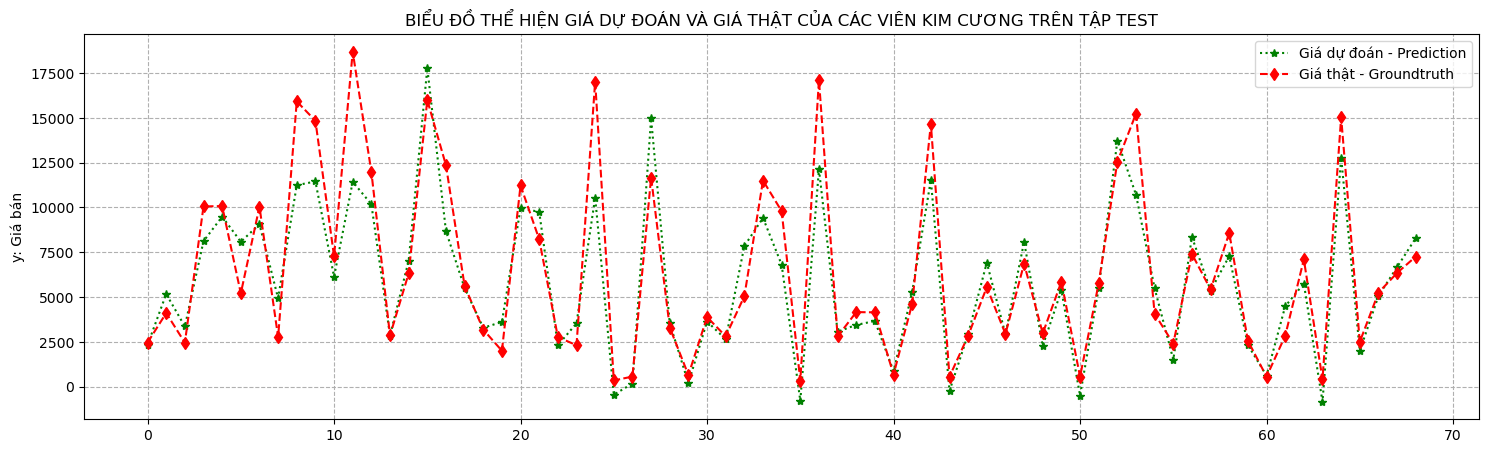

In [202]:
#Trực quan hóa kết quả giá thật và giá dự đoán
plt.figure(figsize=(18,5))
plt.plot(y_pred_db, marker='*',color ='green', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test_db, marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC VIÊN KIM CƯƠNG TRÊN TẬP TEST')
plt.ylabel("y: Giá bán")
plt.grid(ls='--')
plt.legend()
plt.show()